In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
from jax import jacfwd
from IPython import display
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## 1. Neural Networks Encoding Boolean Functions

In [3]:
X = [[0,0], [0,1], [1,0], [1,1]]
Y = np.array([0, 0, 0, 1])

N = [2,1]
w,b = [[[10.,10.]]],[-14.5]

print(w,b)


[[[10.0, 10.0]]] [-14.5]


In [4]:
def feed_forward(x0,w,b):
    a = x0
    num_layers = len(w)
    
    # feed the input layer forward
    for ℓ in range(num_layers):
        z = np.dot(w[ℓ],a) + b[ℓ]
        a = 1.0/(1.0+np.exp(-z))
    return a

([<matplotlib.axis.YTick at 0x2b32fe0a49d0>,
 [Text(0, 0, '1'), Text(0, 1, '0')])

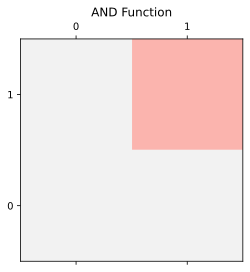

In [25]:
output = np.array([feed_forward(X[i],w,b)[0] for i in range(len(X))])

plt.matshow(output.reshape((2,2))[::-1], cmap='Pastel1_r')
plt.title('AND Function')
plt.yticks([0,1], labels=[1,0])

## 2. Feature Mapping and Linear Regression

## 3. Non-Linear Curve Fitting via Gradient Decent

Text(0, 0.5, 'Intensity, S')

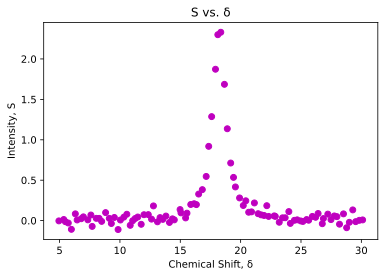

In [26]:
#Load and plot data
x,y = np.loadtxt('./C60_nmr.dat',unpack=True)

plt.plot(x,y, 'o', color='m')
plt.title('S vs. δ')
plt.xlabel('Chemical Shift, δ')
plt.ylabel('Intensity, S')

In [27]:
# We start with our randomized parameters. The range has been adjusted after several iterations.

α0 = np.random.uniform(low=15,high=20)
β0 = np.random.uniform(low=0,high=1)

In [28]:
# This defines our model function
def S(x,a,b):
     return(1/((x-a)**2+b))

In [29]:
# Here, we define our cost function
def C(x, a, b, y):
    return((y - S(x,a,b))**2)

In [30]:
df_dw = jacfwd(C,argnums=[1,2])

In [31]:
# hyperparameters
η = 0.01
w = [α0, β0]
num_iter = 30
  
for i in range(num_iter): #loops through iterations
    
    for j in range(len(x)): #loops through x values
        
        # perform the GD update
        w += -η*np.array([float(df_dw(x[j], w[0], w[1],y[j])[i]) for i in range(2)]) #Jacobian of cost function

    

In [32]:
print(w)

[18.22898011  0.41775398]


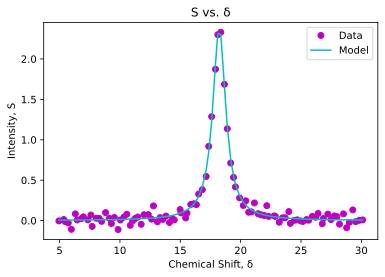

In [270]:
plt.plot(x,y, 'o', color='m',label='Data')
plt.plot(x,S(x,w[0],w[1]), color='c', label='Model')

plt.title('S vs. δ')
plt.xlabel('Chemical Shift, δ')
plt.ylabel('Intensity, S')

plt.legend()

In [271]:
final_params = {"alpha": w[0],"beta": w[1],"num_iter": num_iter,"eta": η}

In [275]:
json.dump(final_params, open('C60_optimal.json', 'w'),indent=1)